## Exercise:

Use Ridge Regression and Lasso Regression with different alphas on Admission_predict.csv.  
What is the best alphas for each model? How does the preformance of the models compared with each other?

In [111]:
# Import Libraries

import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Dataset Admission_predict.csv

In [147]:
admission = pd.read_csv('Admission_predict.csv') 
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [148]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [165]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [149]:
# pilih feture dan target

X = admission.drop(columns=['Chance of Admit ','Serial No.'])
y = admission['Chance of Admit ']

In [150]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 1899
)

# Ridge Regression

In [151]:
hyperparam_c = [100000,10000,1000,100,10,1,0.1,0.01,0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(hyperparam_c)):

    # fitting data (data belajar)
    ridgereg = Ridge(alpha=hyperparam_c[i])
    ridgereg.fit(X_train, y_train)

    # predict data (data train dites)
    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))

    # predict data (data test dites)
    y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score = mse_score # mse_score adalah testing_mse
        best_c = hyperparam_c[i]

    if score > mse_score:
        score = mse_score
        best_c = hyperparam_c[i]

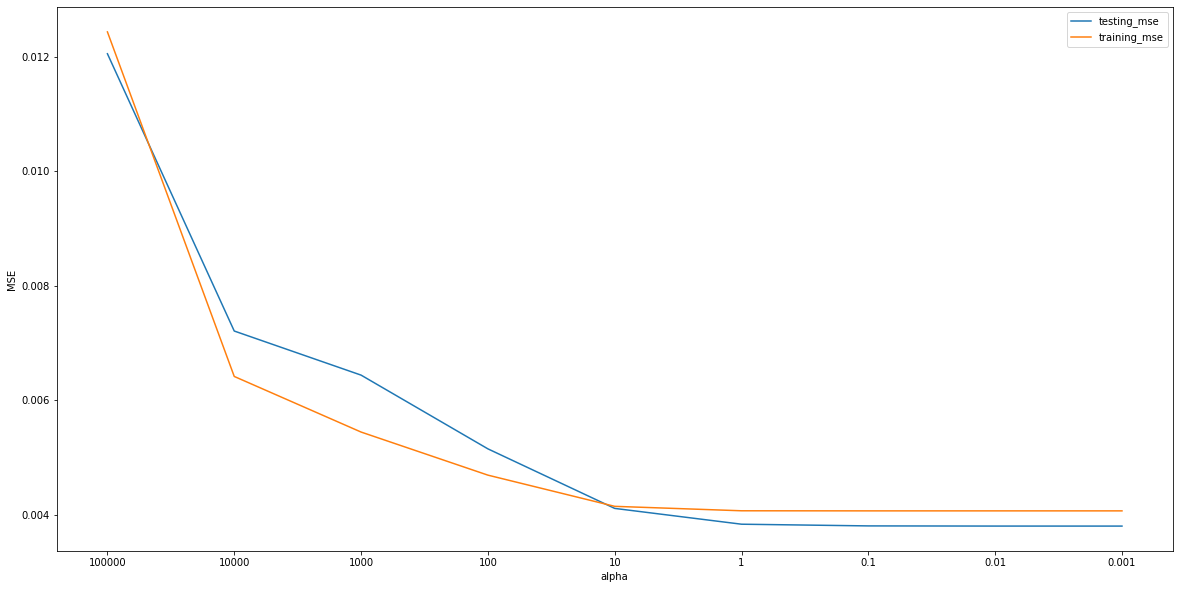

In [152]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing_mse','training_mse'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, hyperparam_c)
plt.show()

In [153]:
print('best_c:', best_c)
print('mse:', score)

best_c: 0.001
mse: 0.00380333594390294


In [154]:
ridgereg = Ridge(alpha=best_c)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [156]:
coef_ridgereg = pd.DataFrame({
    'feature_name:' : list(X),
    'feature_coeff:' : ridgereg.coef_
})

coef_ridgereg

,feature_name:,feature_coeff:
0,GRE Score,0.002132
1,TOEFL Score,0.003868
2,University Rating,0.006711
3,SOP,-0.007530
4,LOR,0.022137
5,CGPA,0.108930
6,Research,0.022463


In [157]:
print('mse train:', mean_squared_error(y_train, y_reg_train))
print('mse test:', mean_squared_error(y_test, y_reg_test))

mse train: 0.004069373542831813
mse test: 0.00380333594390294


## Kesimpulan

- saat alphanya diset di high value, modelnya undefitting karena MSE pada training set dan test set nya besar, dan itu juga menunjukkan bahwa modelnya terlalu simple.

- alpha yg lebih rendah dapat mengurangi MSE baik untuk training set maupun test set sampai MSE pada training agak lebih rendah dari MSE pada test set.???

- alpha terbaik untuk kasus ini adalah alpha=0.001 dengan MSE 0.0038

# Lasso Regression

In [158]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range (len(hyperparam_c)):
    lassoreg = Lasso(alpha = hyperparam_c[i])
    lassoreg.fit(X_train,y_train)

    y_predict_train = lassoreg.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))

    y_predict_test = lassoreg.predict(X_test)
    mse_score = mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score=mse_score
        best_c=hyperparam_c[i]
            
    if score > mse_score:
        score = mse_score
        best_c = hyperparam_c[i]


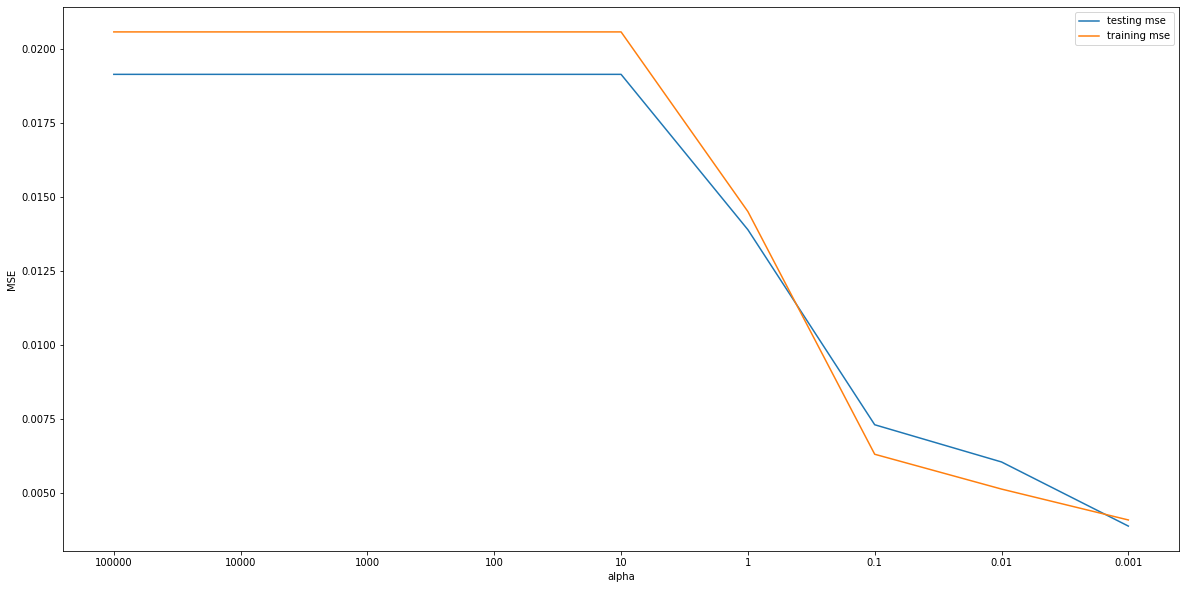

In [159]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing mse','training mse'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [160]:
print('best c:',best_c)
print('mse:', score)

best c: 0.001
mse: 0.00389179485120466


In [161]:
lassoreg = Lasso(alpha= best_c)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [162]:
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [163]:
coef_lassoreg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef': lassoreg.coef_
})

coef_lassoreg

,feature_names,feature coef
0,GRE Score,0.002562
1,TOEFL Score,0.004145
2,University Rating,0.004424
3,SOP,-0.000475
4,LOR,0.019938
5,CGPA,0.096497
6,Research,0.016204


In [164]:
print('mse train:', mean_squared_error(y_train, y_reg_train))
print('mse test:', mean_squared_error(y_test, y_reg_test))

mse train: 0.004098901174978956
mse test: 0.00389179485120466


# Kesimpulan

1. Ridge Regression
    - best_c : 0.001
    - mse test : 0.00380

2. Lasso Regression
    - best_c : 0.001
    - mse test : 0.00389


- Dengan kedua method ini, alpha terbaik yg terpilihnya sama yaitu pada 0.001

- MSE score : Lasso > Ridge (jarak rata-rata error lebih banyak di Lasso)

- Feature Coeff : Ridge > Lasso (coeff menggunakan Ridge lebih mempengaruhi nilai target)   


- underfitting : saat MSE nya tinggi
- overfitting : saat nilai MSE of test jauh lebih tinggi dibanding MSE of train